In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
df= pd.read_csv('./vgsales.csv', na_values='?')

# Order datasets

In [ ]:
df=df.drop(['NA_Sales'], axis=1) 
df = df.drop(['EU_Sales'], axis=1) 
df = df.drop(['JP_Sales'], axis=1) 
df =df.drop(['Other_Sales'], axis=1)

In [ ]:
dfWithDummiesGen =  pd.concat([df, pd.get_dummies(df['Genre'])], axis=1)
dfWithDummiesPubli=pd.concat([df, pd.get_dummies(df['Publisher'])], axis=1)
dfWithDummiesPlataform=pd.concat([df, pd.get_dummies(df['Platform'])], axis=1)

In [ ]:
df_balanced = df.copy()
df_balanced.drop(df_balanced[df_balanced.Global_Sales > 1].index, inplace=True)

In [ ]:
df_unbalanced = df.copy()
df_unbalanced.drop(df_unbalanced[df_unbalanced.Global_Sales <= 1].index, inplace=True)

In [ ]:
import datetime

current_year = datetime.datetime.now().year
df_balanced['YearsSincePublished'] = current_year - df_balanced['Year']

In [ ]:
dfWithDummiesPubli2=pd.concat([df_balanced, pd.get_dummies(df_balanced['Publisher'])], axis=1)

In [ ]:
genreDummies = pd.get_dummies(df_balanced['Genre'])
platformDummies = pd.get_dummies(df_balanced['Platform'])
publisherDummies = pd.get_dummies(df_balanced['Publisher'])

# Creamos un nuevo df solo con los dummies de publisher
publisher_dummies = pd.get_dummies(df_balanced['Publisher'])

# Se calcula la correlación entre las columnas dummies y la variable target de 'sales'
corr_for_Publisher = dfWithDummiesPubli2.corr()['Global_Sales'][publisher_dummies.columns]

# El valor de correlación del que vamos a filtrar
corr_to_filter = 0.03

# Sacamos las columnas con una correlación (en valor absoluto) mayor a 0.01
corr_filtered = corr_for_Publisher[abs(corr_for_Publisher)>corr_to_filter]

# Hacemos una lista de las columnas con correlación mayor a 0.01
columns_to_keep=corr_filtered.index.tolist()

# añadimos todas las columnas que queremos al nuevo df: df_dummies_filtered
df_dummies_filtered = dfWithDummiesPubli2[columns_to_keep]

allDummies = pd.concat([genreDummies, platformDummies, df_dummies_filtered], axis=1)

<ipython-input-11-24a55d1dbe11>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_for_Publisher = dfWithDummiesPubli2.corr()['Global_Sales'][publisher_dummies.columns]


In [ ]:
finalDf = pd.concat([df_balanced['YearsSincePublished'], allDummies], axis=1)

In [ ]:
finalDfCopy = finalDf.copy()
finalDfCopy = finalDfCopy[finalDfCopy['YearsSincePublished'].notna()]

In [ ]:
df_balanced_copy = df_balanced.copy()
df_balanced_copy = df_balanced_copy[df_balanced_copy['YearsSincePublished'].notna()]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
y = df_balanced_copy['Global_Sales']

# variables predictoras (todas las columnas excepto Global_Sales)
X = finalDfCopy

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# crear instancia del modelo y entrenarlo
# Ajustar el modelo de regresión lineal a las características polinómicas
#poly = PolynomialFeatures(degree=2)

#X_poly = poly.fit_transform(X_train)
lr = LinearRegression()
lr.fit(X_train, y_train)

# Ajustar el modelo de regresión lineal a las características polinómicas
poly_reg = LinearRegression()
poly_reg.fit(X_train, y_train)

#X_poly_test = poly.fit_transform(X_test)

# predecir valores
y_pred = poly_reg.predict(X_test)

In [ ]:
df_balanced_copy_2 = df_balanced_copy.copy()

In [ ]:
X = df_balanced_copy_2
y = df_balanced_copy_2['Global_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# Pycaret imports

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00

In [ ]:
from pycaret.regression import *

# Prediction without removing 'rank'

In [ ]:
exp_reg101 = setup(data = X_train, target='Global_Sales', session_id=123)

,Description,Value
0,Session id,123
1,Target,Global_Sales
2,Target type,Regression
3,Original data shape,"(12865, 8)"
4,Transformed data shape,"(12865, 19)"
5,Transformed train set shape,"(9005, 19)"
6,Transformed test set shape,"(3860, 19)"
7,Numeric features,3
8,Categorical features,4
9,Rows with missing values,0.2%


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.0003,0.0000,0.0012,1.0000,0.0008,0.0015,0.6000
dt,Decision Tree Regressor,0.0001,0.0000,0.0009,1.0000,0.0006,0.0004,0.3380
xgboost,Extreme Gradient Boosting,0.0002,0.0000,0.0010,1.0000,0.0007,0.0009,0.8280
rf,Random Forest Regressor,0.0001,0.0000,0.0008,1.0000,0.0006,0.0006,1.8310
gbr,Gradient Boosting Regressor,0.0003,0.0000,0.0011,1.0000,0.0007,0.0016,1.4700
lightgbm,Light Gradient Boosting Machine,0.0015,0.0000,0.0029,0.9998,0.0020,0.0104,0.7300
ada,AdaBoost Regressor,0.0135,0.0003,0.0166,0.9947,0.0147,0.3535,1.0230
et,Extra Trees Regressor,0.0048,0.0003,0.0175,0.9940,0.0102,0.0234,1.6910
llar,Lasso Least Angle Regression,0.0814,0.0109,0.1044,0.7899,0.0703,1.3128,0.3260
omp,Orthogonal Matching Pursuit,0.0815,0.0109,0.1044,0.7899,0.0704,1.3166,0.3460


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KNeighborsRegressor(n_jobs=-1)

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0015,0.0000,0.0030,0.9998,0.0021,0.0113
1,0.0015,0.0000,0.0028,0.9998,0.0020,0.0102
2,0.0016,0.0000,0.0029,0.9998,0.0021,0.0116
3,0.0014,0.0000,0.0028,0.9998,0.0019,0.0092
4,0.0017,0.0000,0.0031,0.9998,0.0020,0.0112
5,0.0014,0.0000,0.0027,0.9998,0.0019,0.0080
6,0.0014,0.0000,0.0028,0.9999,0.0019,0.0083
7,0.0016,0.0000,0.0031,0.9998,0.0021,0.0121
8,0.0012,0.0000,0.0025,0.9999,0.0017,0.0109


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0176,0.0006,0.0249,0.9887,0.0182,0.3928
1,0.0157,0.0005,0.0225,0.9898,0.0170,0.3806
2,0.0168,0.0006,0.0251,0.9874,0.0182,0.4128
3,0.0161,0.0006,0.0243,0.9877,0.0179,0.4178
4,0.0181,0.0007,0.0270,0.9878,0.0190,0.4159
5,0.0157,0.0005,0.0224,0.9898,0.0164,0.3250
6,0.0160,0.0005,0.0222,0.9906,0.0170,0.3953
7,0.0170,0.0006,0.0245,0.9893,0.0182,0.4389
8,0.0165,0.0006,0.0246,0.9874,0.0184,0.4616


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


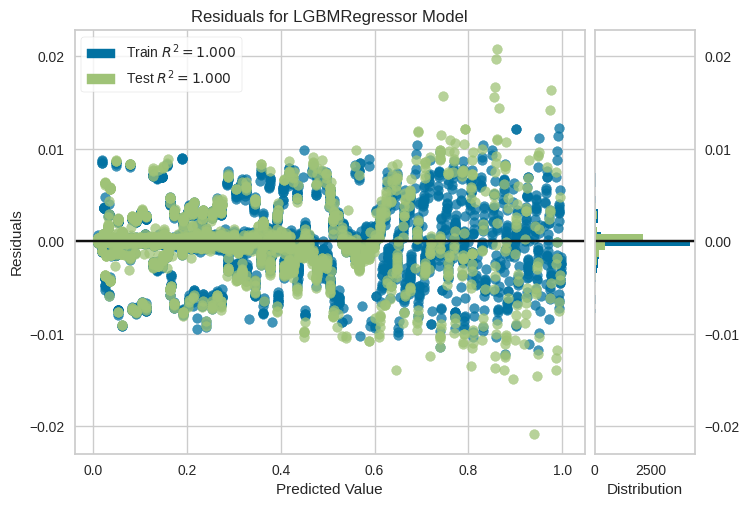

In [ ]:
plot_model(tuned_lightgbm)

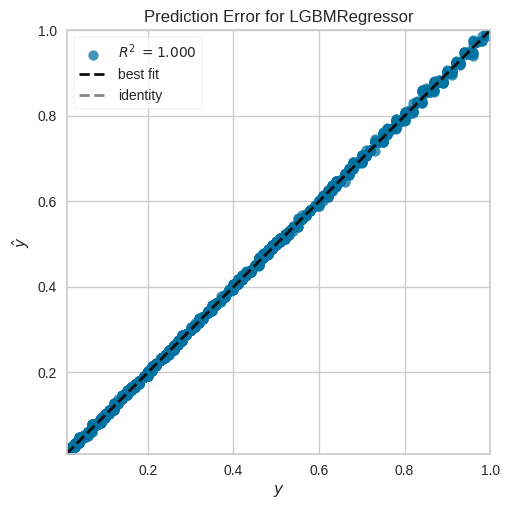

In [ ]:
plot_model(tuned_lightgbm, plot = 'error')

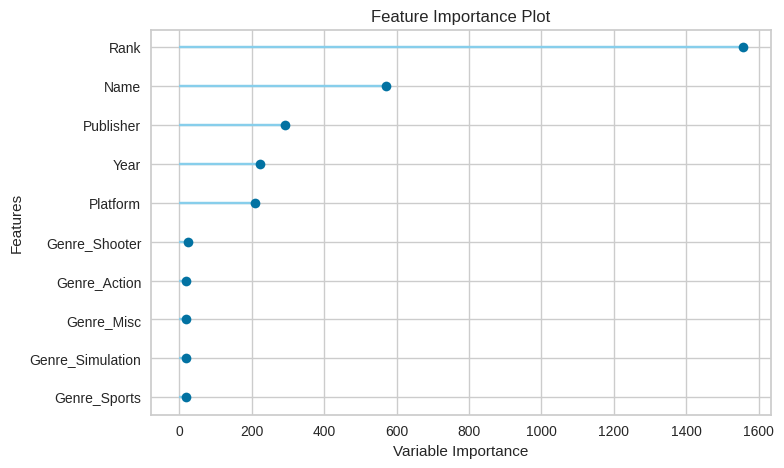

In [ ]:
plot_model(tuned_lightgbm, plot='feature')

In [ ]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0015,0.0000,0.0029,0.9998,0.0020,0.0092


In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [ ]:
print(final_lightgbm)


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Rank', 'Year',
                                             'YearsSincePublished'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Name', 'Platform', 'Genre',
                                             'Publisher'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Genre'],
                                    transformer=OneHotEncoder(cols=['Genre'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['Name', 'Platform', 'Publis

In [ ]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0014,0.0000,0.0027,0.9999,0.0019,0.0079


In [ ]:
unseen_predictions = predict_model(final_lightgbm, data=X_test)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0015,0.0000,0.0030,0.9998,0.0021,0.0093


,Rank,Name,Platform,Year,Genre,Publisher,YearsSincePublished,Global_Sales,prediction_label
10430,10432,Derby Stallion P,PSP,2006.0,Sports,Enterbrain,17.0,0.10,0.100053
9412,9414,Shining Force III,SAT,1997.0,Strategy,Sega,26.0,0.13,0.130112
9229,9231,MySims Collection,Wii,2010.0,Misc,Electronic Arts,13.0,0.14,0.140141
14800,14803,Battlezone,PSP,2006.0,Shooter,Atari,17.0,0.03,0.030153
14582,14585,HappinessCharge PreCure! Kawarun Collection,3DS,2014.0,Misc,Namco Bandai Games,9.0,0.03,0.030156


In [ ]:
unseen_predictions.T

,10430,9412,9229,14800,14582,8289,7805,7556,2543,10193,...,6947,4104,14169,6324,15388,14049,3009,8085,2904,15919
Rank,10432,9414,9231,14803,14585,8291,7807,7558,2545,10195,...,6949,4106,14171,6326,15391,14051,3011,8087,2906,15922
Name,Derby Stallion P,Shining Force III,MySims Collection,Battlezone,HappinessCharge PreCure! Kawarun Collection,Hello Kitty: Happy Party Pals,FaceBreaker,Spectrobes: Origins,Valkyrie Profile,Pac-Man World 2,...,Lunar Knights,Pinball Hall of Fame: The Williams Collection,Driven,Over the Hedge,Uta no * Prince-Sama,Gothic Universe,Return to Castle Wolfenstein: Tides of War,Battle Commander: Hachibushu Shura no Heihou,Tony Hawk's Underground,Rayman 10th Anniversary
Platform,PSP,SAT,Wii,PSP,3DS,GBA,X360,Wii,PS,GBA,...,DS,Wii,GBA,GBA,PSP,PC,XB,SNES,GC,GBA
Year,2006.0,1997.0,2010.0,2006.0,2014.0,2005.0,2008.0,2009.0,1999.0,2005.0,...,2006.0,2008.0,2001.0,2006.0,2010.0,2007.0,2003.0,1991.0,2003.0,2005.0
Genre,Sports,Strategy,Misc,Shooter,Misc,Misc,Fighting,Role-Playing,Role-Playing,Action,...,Role-Playing,Misc,Racing,Platform,Adventure,Role-Playing,Shooter,Strategy,Sports,Platform
Publisher,Enterbrain,Sega,Electronic Arts,Atari,Namco Bandai Games,THQ,Electronic Arts,Disney Interactive Studios,Enix Corporation,Zoo Digital Publishing,...,Konami Digital Entertainment,System 3 Arcade Software,BAM! Entertainment,Activision,Broccoli,JoWood Productions,Activision,Banpresto,Activision,Ubisoft
YearsSincePublished,17.0,26.0,13.0,17.0,9.0,18.0,15.0,14.0,24.0,18.0,...,17.0,15.0,22.0,17.0,13.0,16.0,20.0,32.0,20.0,18.0
Global_Sales,0.1,0.13,0.14,0.03,0.03,0.17,0.19,0.2,0.81,0.11,...,0.24,0.48,0.03,0.27,0.02,0.04,0.67,0.18,0.7,0.02
prediction_label,0.100053,0.130112,0.140141,0.030153,0.030156,0.17025,0.189887,0.200058,0.809596,0.110265,...,0.237253,0.481937,0.030472,0.270117,0.020108,0.040239,0.675598,0.180239,0.70728,0.020099


In [ ]:
df_balanced_copy_3 = df_balanced_copy_2.copy()

In [ ]:
df_balanced_copy_3.dtypes

Rank                     int64
Name                    object
Platform                object
Year                   float64
Genre                   object
Publisher               object
Global_Sales           float64
YearsSincePublished    float64
dtype: object

In [ ]:
df_balanced_copy_3 = df_balanced_copy_3.drop(['Rank'], axis = 1)

In [ ]:
X = df_balanced_copy_3
y = df_balanced_copy_3['Global_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Setup Compare Models

In [ ]:
exp_reg101 = setup(data = X_train, target='Global_Sales', session_id=123)

,Description,Value
0,Session id,123
1,Target,Global_Sales
2,Target type,Regression
3,Original data shape,"(12865, 7)"
4,Transformed data shape,"(12865, 18)"
5,Transformed train set shape,"(9005, 18)"
6,Transformed test set shape,"(3860, 18)"
7,Numeric features,2
8,Categorical features,4
9,Rows with missing values,0.2%


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.1505,0.0463,0.2151,0.1105,0.1581,1.7920,0.5190
huber,Huber Regressor,0.1537,0.0469,0.2165,0.0983,0.1579,1.8589,0.6470
ridge,Ridge Regression,0.1653,0.0480,0.2190,0.0772,0.1623,2.5861,0.3840
ada,AdaBoost Regressor,0.1701,0.0507,0.2251,0.0243,0.1677,2.6502,0.5280
lightgbm,Light Gradient Boosting Machine,0.1683,0.0507,0.2252,0.0240,0.1671,2.5951,0.5380
xgboost,Extreme Gradient Boosting,0.1687,0.0510,0.2257,0.0193,0.1677,2.6320,1.4100
gbr,Gradient Boosting Regressor,0.1693,0.0510,0.2257,0.0192,0.1674,2.6201,1.3070
omp,Orthogonal Matching Pursuit,0.1757,0.0514,0.2266,0.0123,0.1687,2.8561,0.3930
rf,Random Forest Regressor,0.1703,0.0517,0.2274,0.0046,0.1689,2.6592,2.7660
et,Extra Trees Regressor,0.1712,0.0518,0.2275,0.0039,0.1691,2.7048,2.8470


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KNeighborsRegressor(n_jobs=-1)

In [ ]:
knn =create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1508,0.0471,0.2171,0.1397,0.1588,1.7267
1,0.1482,0.0428,0.2070,0.1411,0.1532,1.7542
2,0.1513,0.0466,0.2159,0.0742,0.1592,1.8011
3,0.1408,0.0405,0.2014,0.1551,0.1489,1.7287
4,0.1608,0.0544,0.2333,0.0885,0.1698,1.8070
5,0.1487,0.0445,0.2108,0.0945,0.1557,1.6111
6,0.1530,0.0473,0.2175,0.0986,0.1599,1.7931
7,0.1576,0.0506,0.2250,0.0990,0.1650,2.0777
8,0.1405,0.0420,0.2050,0.1238,0.1508,1.8627


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_knn=tune_model(knn)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:24:27
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1517,0.0450,0.2122,0.1781,0.1548,1.8858
1,0.1471,0.0404,0.2010,0.1904,0.1481,1.8527
2,0.1476,0.0432,0.2079,0.1416,0.1526,1.9396
3,0.1406,0.0392,0.1980,0.1831,0.1464,1.9751
4,0.1587,0.0500,0.2235,0.1633,0.1617,1.9263
5,0.1457,0.0409,0.2022,0.1675,0.1489,1.6805
6,0.1508,0.0441,0.2101,0.1594,0.1538,1.9263
7,0.1544,0.0473,0.2176,0.1576,0.1585,2.1358
8,0.1393,0.0402,0.2005,0.1615,0.1473,2.0195


In [ ]:
final_knn = finalize_model(tuned_knn)

In [ ]:
filename="kn_model.sav"
f =open(filename,'wb')
pickle.dump(final_knn,f)
f.close()

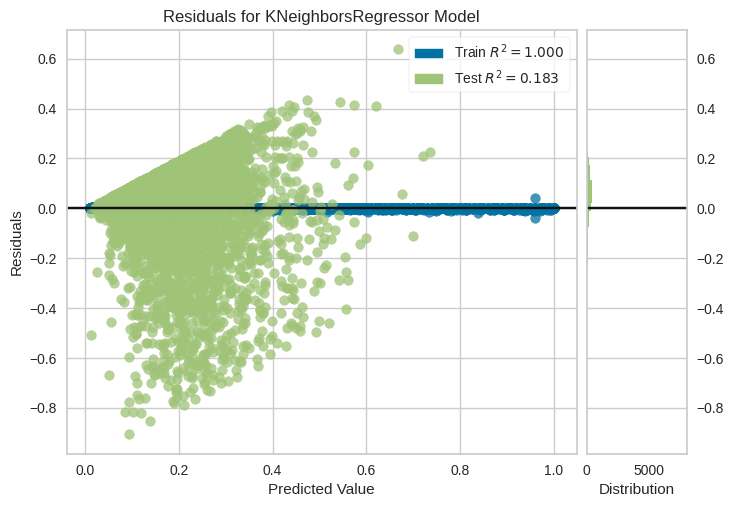

In [ ]:
plot_model(tuned_knn)

# Bayesian Ridge

In [ ]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1777,0.0551,0.2347,-0.0054,0.1735,2.6445
1,0.1689,0.0490,0.2213,0.0184,0.1649,2.6738
2,0.1701,0.0524,0.2288,-0.0403,0.1698,2.7749
3,0.1671,0.0490,0.2215,-0.0220,0.1656,2.8031
4,0.1819,0.0573,0.2393,0.0412,0.1758,2.7558
5,0.1682,0.0491,0.2216,-0.0005,0.1648,2.3465
6,0.1740,0.0531,0.2304,-0.0112,0.1711,2.7015
7,0.1745,0.0551,0.2346,0.0200,0.1732,2.9698
8,0.1649,0.0492,0.2219,-0.0269,0.1657,2.8964


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_br = tune_model(br)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1777,0.0551,0.2347,-0.0054,0.1735,2.6445
1,0.1689,0.0490,0.2213,0.0184,0.1649,2.6738
2,0.1701,0.0524,0.2288,-0.0403,0.1698,2.7749
3,0.1671,0.0490,0.2215,-0.0219,0.1656,2.8031
4,0.1819,0.0573,0.2393,0.0412,0.1758,2.7558
5,0.1682,0.0491,0.2216,-0.0005,0.1648,2.3465
6,0.1740,0.0531,0.2304,-0.0112,0.1711,2.7015
7,0.1745,0.0551,0.2346,0.0200,0.1732,2.9698
8,0.1649,0.0492,0.2219,-0.0268,0.1657,2.8964


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


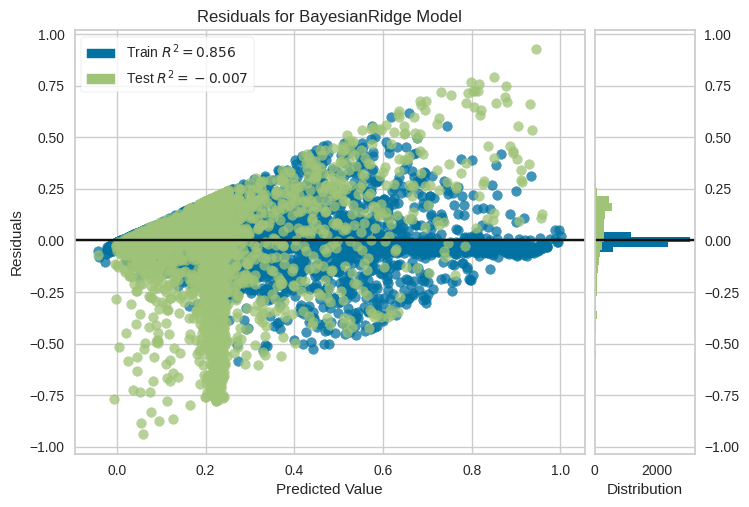

In [ ]:
plot_model(tuned_br)

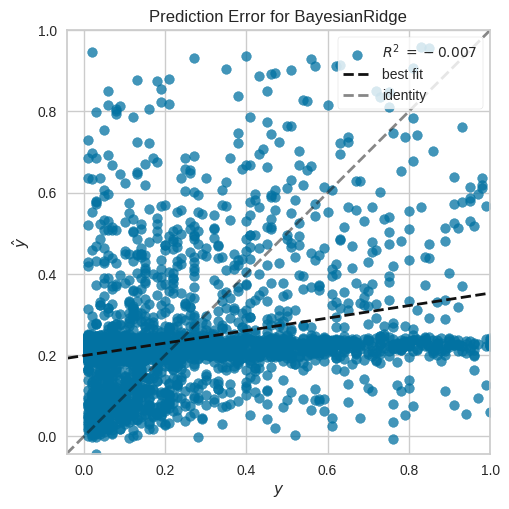

In [ ]:
plot_model(tuned_br, plot='error')

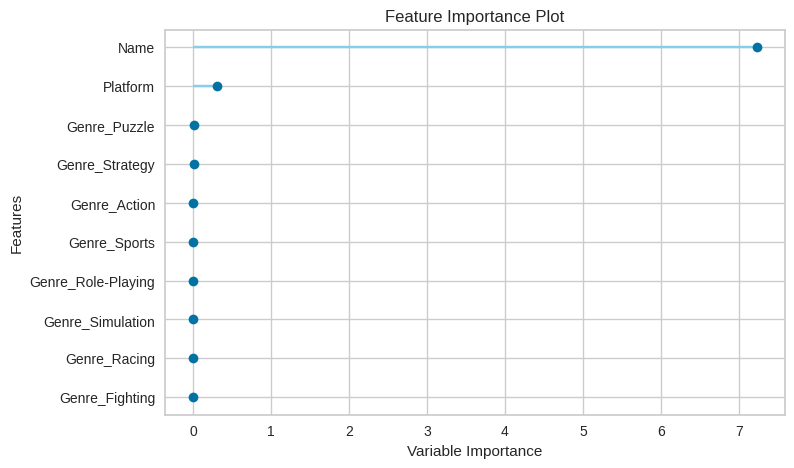

In [ ]:
plot_model(tuned_br, plot='feature')

In [ ]:
predict_model(tuned_br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.1721,0.0521,0.2283,-0.0074,0.1697,2.7137


,Name,Platform,Year,Genre,Publisher,YearsSincePublished,Global_Sales,prediction_label
3106,Monster Jam: Maximum Destruction,PS2,2002.0,Racing,Ubisoft,21.0,0.65,0.224923
5758,Doubutsu no Mori,N64,2001.0,Simulation,Nintendo,22.0,0.31,0.246485
7739,Big Mutha Truckers,XB,2002.0,Racing,Empire Interactive,21.0,0.19,0.324616
2795,Dragon Ball Z: Ultime Menace,SNES,1993.0,Fighting,Namco Bandai Games,30.0,0.73,0.228617
4231,Dragon Ball Z: Collectible Card Game,GBA,2002.0,Misc,Infogrames,21.0,0.46,0.211685
...,...,...,...,...,...,...,...,...
13238,Next Generation of Chaos,PS2,2002.0,Role-Playing,Idea Factory,21.0,0.05,0.233407
16020,Uppers,PSV,2016.0,Action,Marvelous Entertainment,7.0,0.01,0.193149
2519,Tales of the Abyss,3DS,2011.0,Role-Playing,Namco Bandai Games,12.0,0.82,0.213270
8026,Super Robot Taisen J,GBA,2005.0,Strategy,Banpresto,18.0,0.18,0.220728


In [ ]:
final_br = finalize_model(tuned_br)

In [ ]:
print(final_br)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Year', 'YearsSincePublished'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Name', 'Platform', 'Genre',
                                             'Publisher'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(inc...
                                    transformer=OneHotEncoder(cols=['Genre'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['Name', 'Platform', 'Publisher'],
                                    transformer=TargetEnco

In [ ]:
predict_model(final_br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.1699,0.0511,0.2260,0.0126,0.1679,2.6598


,Name,Platform,Year,Genre,Publisher,YearsSincePublished,Global_Sales,prediction_label
3106,Monster Jam: Maximum Destruction,PS2,2002.0,Racing,Ubisoft,21.0,0.65,0.225909
5758,Doubutsu no Mori,N64,2001.0,Simulation,Nintendo,22.0,0.31,0.255417
7739,Big Mutha Truckers,XB,2002.0,Racing,Empire Interactive,21.0,0.19,0.319200
2795,Dragon Ball Z: Ultime Menace,SNES,1993.0,Fighting,Namco Bandai Games,30.0,0.73,0.232278
4231,Dragon Ball Z: Collectible Card Game,GBA,2002.0,Misc,Infogrames,21.0,0.46,0.207164
...,...,...,...,...,...,...,...,...
13238,Next Generation of Chaos,PS2,2002.0,Role-Playing,Idea Factory,21.0,0.05,0.235046
16020,Uppers,PSV,2016.0,Action,Marvelous Entertainment,7.0,0.01,0.180840
2519,Tales of the Abyss,3DS,2011.0,Role-Playing,Namco Bandai Games,12.0,0.82,0.207810
8026,Super Robot Taisen J,GBA,2005.0,Strategy,Banpresto,18.0,0.18,0.220218


In [ ]:
unseen_predictions = predict_model(final_br, data=X_test)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.1667,0.0493,0.2220,0.0282,0.1646,2.4743


,Name,Platform,Year,Genre,Publisher,YearsSincePublished,Global_Sales,prediction_label
10430,Derby Stallion P,PSP,2006.0,Sports,Enterbrain,17.0,0.10,0.186121
9412,Shining Force III,SAT,1997.0,Strategy,Sega,26.0,0.13,0.204235
9229,MySims Collection,Wii,2010.0,Misc,Electronic Arts,13.0,0.14,0.229611
14800,Battlezone,PSP,2006.0,Shooter,Atari,17.0,0.03,0.552529
14582,HappinessCharge PreCure! Kawarun Collection,3DS,2014.0,Misc,Namco Bandai Games,9.0,0.03,0.207357


In [ ]:
filename="br_model.sav"
f =open(filename,'wb')
pickle.dump(final_br,f)
f.close

<function BufferedWriter.close>

# Ridge Regression

In [ ]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1700,0.0504,0.2244,0.0806,0.1657,2.5273
1,0.1623,0.0448,0.2116,0.1026,0.1577,2.5541
2,0.1642,0.0483,0.2197,0.0408,0.1630,2.6488
3,0.1604,0.0448,0.2117,0.0661,0.1582,2.6591
4,0.1752,0.0534,0.2310,0.1065,0.1692,2.6163
5,0.1618,0.0451,0.2125,0.0803,0.1580,2.2464
6,0.1671,0.0491,0.2216,0.0648,0.1645,2.5874
7,0.1684,0.0511,0.2260,0.0905,0.1666,2.8346
8,0.1588,0.0454,0.2131,0.0528,0.1589,2.7598


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_ridge = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1597,0.0435,0.2085,0.2067,0.1533,2.3261
1,0.1518,0.0389,0.1972,0.2205,0.1465,2.3072
2,0.1550,0.0422,0.2054,0.1617,0.1519,2.4024
3,0.1503,0.0385,0.1963,0.1967,0.1462,2.3767
4,0.1644,0.0479,0.2188,0.1985,0.1590,2.3360
5,0.1528,0.0394,0.1985,0.1973,0.1472,2.0666
6,0.1567,0.0436,0.2087,0.1703,0.1543,2.3636
7,0.1611,0.0459,0.2143,0.1822,0.1574,2.5779
8,0.1491,0.0397,0.1993,0.1720,0.1481,2.4988


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


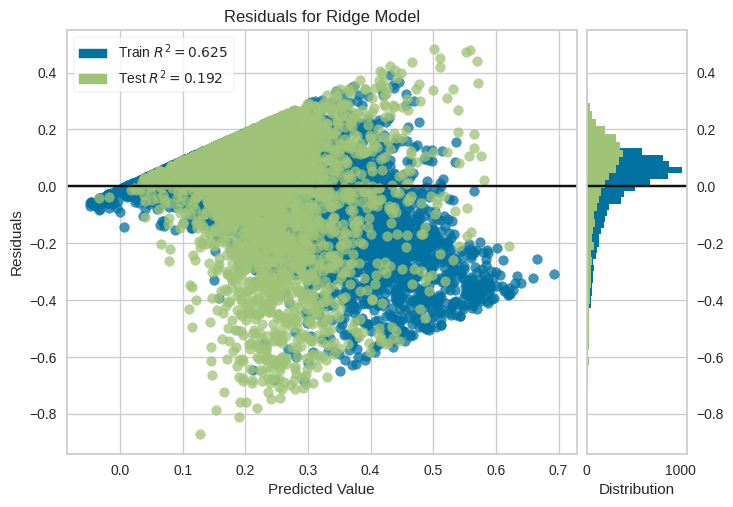

In [ ]:
plot_model(tuned_ridge)

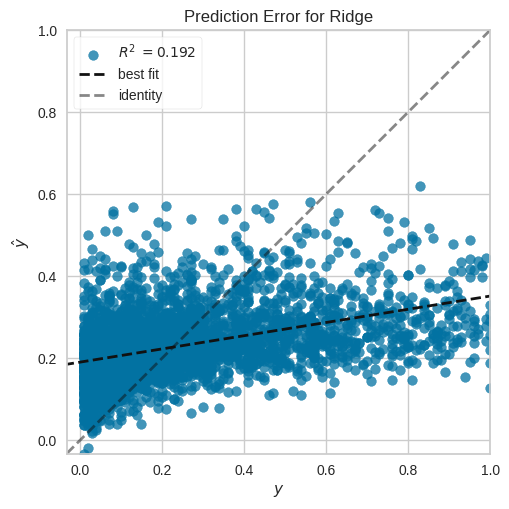

In [ ]:
plot_model(tuned_ridge, plot='error')

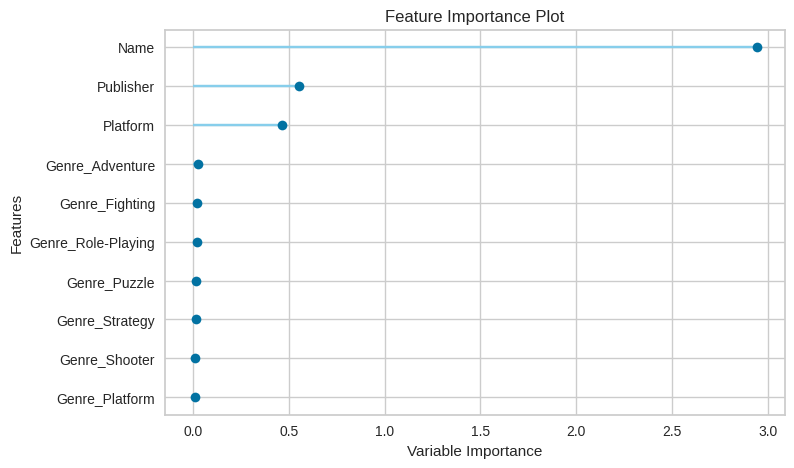

In [ ]:
plot_model(tuned_ridge, plot='feature')

In [ ]:
final_ridge = finalize_model(tuned_ridge)

In [ ]:
print(final_ridge)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Year', 'YearsSincePublished'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Name', 'Platform', 'Genre',
                                             'Publisher'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Genre'],
                                    transformer=OneHotEncoder(cols=['Genre'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['Name', 'Platform', 'Publisher'],
                                    transforme

In [ ]:
predict_model(final_ridge)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.1558,0.0422,0.2053,0.1850,0.1522,2.4056


,Name,Platform,Year,Genre,Publisher,YearsSincePublished,Global_Sales,prediction_label
3106,Monster Jam: Maximum Destruction,PS2,2002.0,Racing,Ubisoft,21.0,0.65,0.242500
5758,Doubutsu no Mori,N64,2001.0,Simulation,Nintendo,22.0,0.31,0.335546
7739,Big Mutha Truckers,XB,2002.0,Racing,Empire Interactive,21.0,0.19,0.261901
2795,Dragon Ball Z: Ultime Menace,SNES,1993.0,Fighting,Namco Bandai Games,30.0,0.73,0.244356
4231,Dragon Ball Z: Collectible Card Game,GBA,2002.0,Misc,Infogrames,21.0,0.46,0.198387
...,...,...,...,...,...,...,...,...
13238,Next Generation of Chaos,PS2,2002.0,Role-Playing,Idea Factory,21.0,0.05,0.153829
16020,Uppers,PSV,2016.0,Action,Marvelous Entertainment,7.0,0.01,0.161433
2519,Tales of the Abyss,3DS,2011.0,Role-Playing,Namco Bandai Games,12.0,0.82,0.189653
8026,Super Robot Taisen J,GBA,2005.0,Strategy,Banpresto,18.0,0.18,0.176649


In [ ]:
unseen_predictions = predict_model(final_ridge, data=X_test)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.1513,0.0397,0.1993,0.2169,0.1477,2.2076


,Name,Platform,Year,Genre,Publisher,YearsSincePublished,Global_Sales,prediction_label
10430,Derby Stallion P,PSP,2006.0,Sports,Enterbrain,17.0,0.10,0.169220
9412,Shining Force III,SAT,1997.0,Strategy,Sega,26.0,0.13,0.183351
9229,MySims Collection,Wii,2010.0,Misc,Electronic Arts,13.0,0.14,0.292132
14800,Battlezone,PSP,2006.0,Shooter,Atari,17.0,0.03,0.368713
14582,HappinessCharge PreCure! Kawarun Collection,3DS,2014.0,Misc,Namco Bandai Games,9.0,0.03,0.174964


# Lasso Regression

In [ ]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1834,0.0548,0.2341,-0.0006,0.1741,2.9453
1,0.1734,0.0499,0.2234,-0.0002,0.1669,2.8162
2,0.1736,0.0503,0.2244,-0.0002,0.1674,3.0146
3,0.1718,0.0482,0.2195,-0.0038,0.1650,3.0661
4,0.1915,0.0599,0.2448,-0.0034,0.1804,3.0540
5,0.1732,0.0491,0.2216,-0.0000,0.1658,2.6430
6,0.1788,0.0525,0.2292,-0.0002,0.1706,2.9103
7,0.1837,0.0562,0.2371,-0.0003,0.1755,3.1358
8,0.1719,0.0482,0.2196,-0.0057,0.1655,3.2913


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lasso = tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1834,0.0548,0.2341,-0.0006,0.1741,2.9453
1,0.1734,0.0499,0.2234,-0.0002,0.1669,2.8162
2,0.1736,0.0503,0.2244,-0.0002,0.1674,3.0146
3,0.1718,0.0482,0.2195,-0.0038,0.1650,3.0661
4,0.1915,0.0599,0.2448,-0.0034,0.1804,3.0540
5,0.1732,0.0491,0.2216,-0.0000,0.1658,2.6430
6,0.1788,0.0525,0.2292,-0.0002,0.1706,2.9103
7,0.1837,0.0562,0.2371,-0.0003,0.1755,3.1358
8,0.1719,0.0482,0.2196,-0.0057,0.1655,3.2913


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


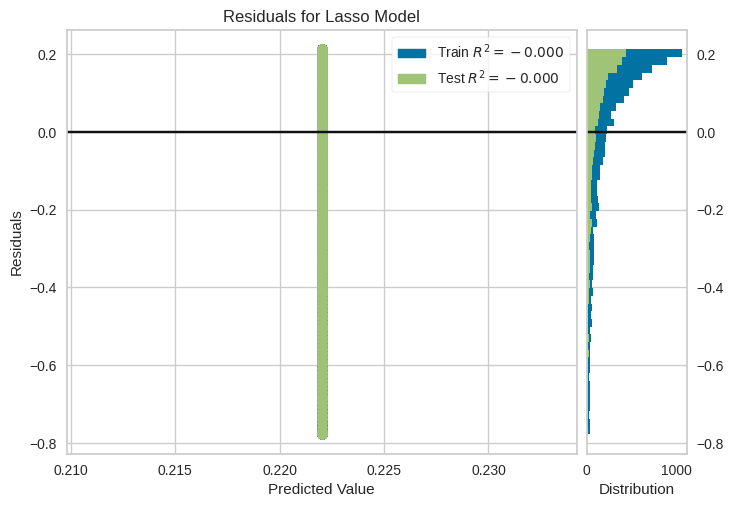

In [ ]:
plot_model(tuned_lasso)

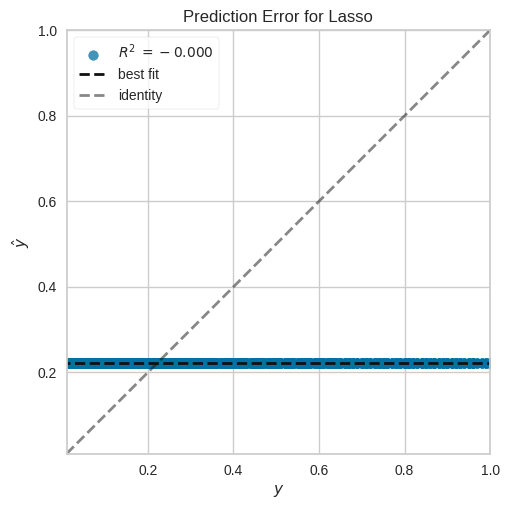

In [ ]:
plot_model(tuned_lasso, plot='error')

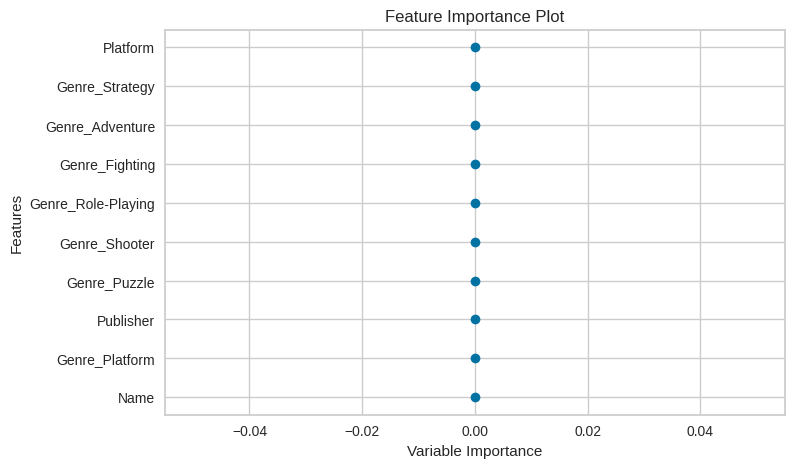

In [ ]:
plot_model(tuned_lasso, plot='feature')

In [ ]:
final_lasso = finalize_model(tuned_lasso)

In [ ]:
print(final_lasso)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Year', 'YearsSincePublished'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Name', 'Platform', 'Genre',
                                             'Publisher'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Genre'],
                                    transformer=OneHotEncoder(cols=['Genre'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['Name', 'Platform', 'Publisher'],
                                    transforme

In [ ]:
predict_model(final_lasso)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.1777,0.0517,0.2274,-0.0000,0.1699,2.9564


,Name,Platform,Year,Genre,Publisher,YearsSincePublished,Global_Sales,prediction_label
3106,Monster Jam: Maximum Destruction,PS2,2002.0,Racing,Ubisoft,21.0,0.65,0.222068
5758,Doubutsu no Mori,N64,2001.0,Simulation,Nintendo,22.0,0.31,0.222068
7739,Big Mutha Truckers,XB,2002.0,Racing,Empire Interactive,21.0,0.19,0.222068
2795,Dragon Ball Z: Ultime Menace,SNES,1993.0,Fighting,Namco Bandai Games,30.0,0.73,0.222068
4231,Dragon Ball Z: Collectible Card Game,GBA,2002.0,Misc,Infogrames,21.0,0.46,0.222068
...,...,...,...,...,...,...,...,...
13238,Next Generation of Chaos,PS2,2002.0,Role-Playing,Idea Factory,21.0,0.05,0.222068
16020,Uppers,PSV,2016.0,Action,Marvelous Entertainment,7.0,0.01,0.222068
2519,Tales of the Abyss,3DS,2011.0,Role-Playing,Namco Bandai Games,12.0,0.82,0.222068
8026,Super Robot Taisen J,GBA,2005.0,Strategy,Banpresto,18.0,0.18,0.222068


In [ ]:
unseen_predictions = predict_model(final_lasso, data=X_test)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.1750,0.0507,0.2253,-0.0002,0.1677,2.6838


,Name,Platform,Year,Genre,Publisher,YearsSincePublished,Global_Sales,prediction_label
10430,Derby Stallion P,PSP,2006.0,Sports,Enterbrain,17.0,0.10,0.222068
9412,Shining Force III,SAT,1997.0,Strategy,Sega,26.0,0.13,0.222068
9229,MySims Collection,Wii,2010.0,Misc,Electronic Arts,13.0,0.14,0.222068
14800,Battlezone,PSP,2006.0,Shooter,Atari,17.0,0.03,0.222068
14582,HappinessCharge PreCure! Kawarun Collection,3DS,2014.0,Misc,Namco Bandai Games,9.0,0.03,0.222068


# Huber Regresion

In [ ]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1613,0.0505,0.2247,0.0783,0.1642,1.8589
1,0.1539,0.0459,0.2143,0.0793,0.1580,1.9219
2,0.1551,0.0465,0.2156,0.0770,0.1579,1.9843
3,0.1469,0.0431,0.2077,0.1014,0.1530,1.8818
4,0.1625,0.0523,0.2287,0.1241,0.1641,1.8732
5,0.1494,0.0420,0.2049,0.1446,0.1503,1.6688
6,0.1569,0.0501,0.2239,0.0455,0.1632,1.8224
7,0.1581,0.0518,0.2277,0.0771,0.1643,1.9298
8,0.1429,0.0416,0.2040,0.1317,0.1497,1.9683


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_huber = tune_model(huber)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1679,0.0493,0.2220,0.1005,0.1636,2.2286
1,0.1540,0.0407,0.2018,0.1837,0.1494,2.0372
2,0.1572,0.0439,0.2096,0.1273,0.1546,2.1808
3,0.1512,0.0423,0.2058,0.1176,0.1531,2.1357
4,0.1616,0.0488,0.2208,0.1834,0.1597,2.0446
5,0.1589,0.0442,0.2102,0.0999,0.1562,1.9878
6,0.1619,0.0478,0.2186,0.0899,0.1616,2.2256
7,0.1633,0.0492,0.2219,0.1239,0.1630,2.3319
8,0.1554,0.0446,0.2112,0.0693,0.1566,2.4423


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


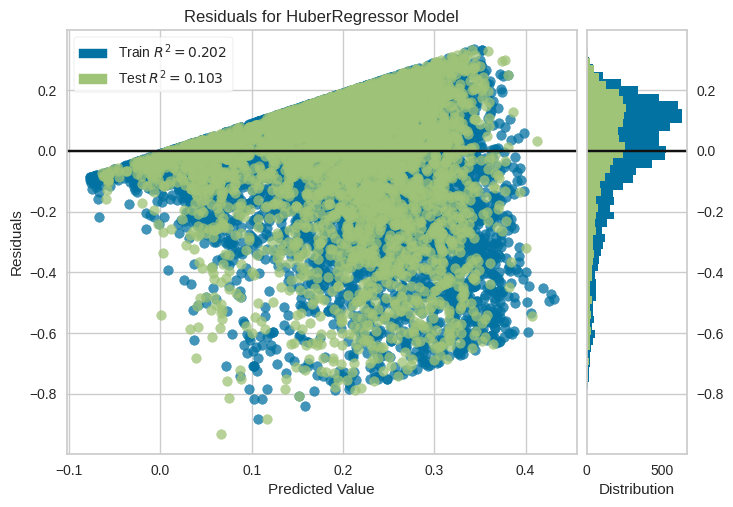

In [ ]:
plot_model(tuned_huber)

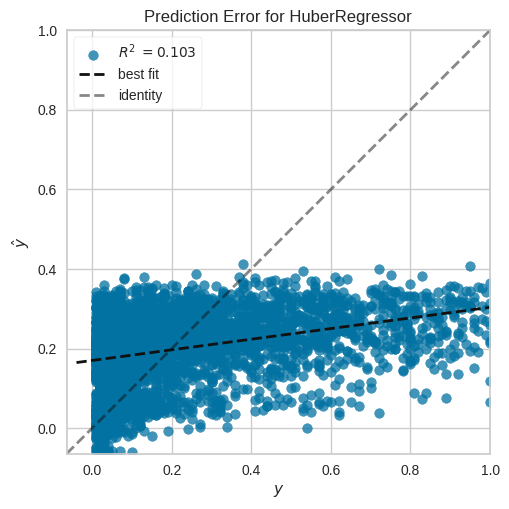

In [ ]:
plot_model(tuned_huber, plot='error')

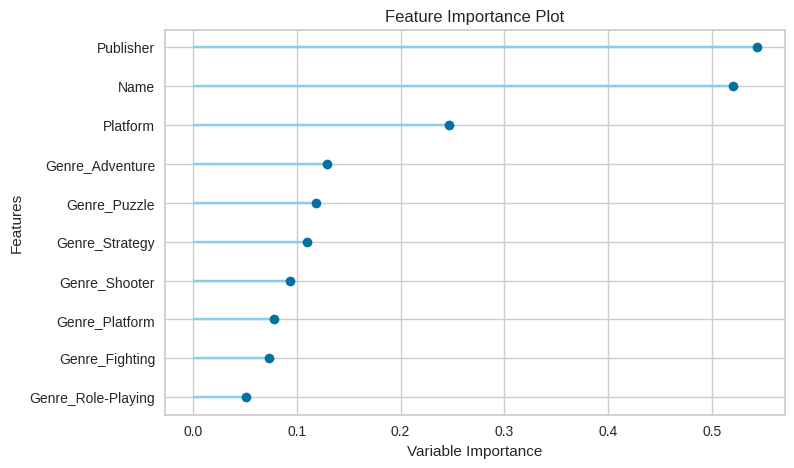

In [ ]:
plot_model(tuned_huber, plot='feature')

In [ ]:
final_huber = finalize_model(tuned_huber)

In [ ]:
print(final_huber)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Year', 'YearsSincePublished'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Name', 'Platform', 'Genre',
                                             'Publisher'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Genre'],
                                    transformer=OneHotEncoder(cols=['Genre'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['Name', 'Platform', 'Publisher'],
                                    transforme

In [ ]:
predict_model(final_huber)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.1575,0.0438,0.2092,0.1537,0.1549,2.2013


,Name,Platform,Year,Genre,Publisher,YearsSincePublished,Global_Sales,prediction_label
3106,Monster Jam: Maximum Destruction,PS2,2002.0,Racing,Ubisoft,21.0,0.65,0.264798
5758,Doubutsu no Mori,N64,2001.0,Simulation,Nintendo,22.0,0.31,0.384266
7739,Big Mutha Truckers,XB,2002.0,Racing,Empire Interactive,21.0,0.19,0.232282
2795,Dragon Ball Z: Ultime Menace,SNES,1993.0,Fighting,Namco Bandai Games,30.0,0.73,0.297315
4231,Dragon Ball Z: Collectible Card Game,GBA,2002.0,Misc,Infogrames,21.0,0.46,0.179809
...,...,...,...,...,...,...,...,...
13238,Next Generation of Chaos,PS2,2002.0,Role-Playing,Idea Factory,21.0,0.05,0.068490
16020,Uppers,PSV,2016.0,Action,Marvelous Entertainment,7.0,0.01,0.154147
2519,Tales of the Abyss,3DS,2011.0,Role-Playing,Namco Bandai Games,12.0,0.82,0.173640
8026,Super Robot Taisen J,GBA,2005.0,Strategy,Banpresto,18.0,0.18,0.023668


In [ ]:
unseen_predictions = predict_model(final_huber, data=X_test)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.1532,0.0425,0.2063,0.1614,0.1522,1.9748


,Name,Platform,Year,Genre,Publisher,YearsSincePublished,Global_Sales,prediction_label
10430,Derby Stallion P,PSP,2006.0,Sports,Enterbrain,17.0,0.10,0.084958
9412,Shining Force III,SAT,1997.0,Strategy,Sega,26.0,0.13,0.061675
9229,MySims Collection,Wii,2010.0,Misc,Electronic Arts,13.0,0.14,0.330358
14800,Battlezone,PSP,2006.0,Shooter,Atari,17.0,0.03,0.281740
14582,HappinessCharge PreCure! Kawarun Collection,3DS,2014.0,Misc,Namco Bandai Games,9.0,0.03,0.129966


# Pipelines

Let's see...

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import GridSearchCV
from pycaret.regression import setup, compare_models, create_model, tune_model, finalize_model

In [ ]:
class ColumnDeleter(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_delete):
        self.columns_to_delete = columns_to_delete
    
    def fit(self, X, y=None):
        print("X2: ", X.shape)
        print("Test: ", self)
        return self
    
    def transform(self, X):
        print("Transform X2: ", X.shape)
        return X.drop(columns=self.columns_to_delete, axis=1)

In [ ]:
class FilterDF(BaseEstimator, TransformerMixin):
  def __init__(self, limit):
    self.limit = limit

  def fit(self, X, y=None):
    print("X1: ", X.shape)
    return self

  def transform(self, X):
    print("Transform X1: ", X.shape)
    return X.drop(X[X.Global_Sales > self.limit].index)


In [ ]:
class TrainTestSplitter(BaseEstimator, TransformerMixin):
    def __init__(self, test_size=0.1, random_state=None):
        self.test_size = test_size
        self.random_state = random_state
        self.X_train = None
        self.X_test = None
    
    def fit(self, X):
        print("X: ", X.shape)
        self.X_train, self.X_test, = train_test_split(X, test_size=self.test_size, random_state=self.random_state)
        print("X_train shape: ", self.X_train.shape)
        print("X_test shape: ", self.X_test.shape)
        return self
    
    def transform(self, X):
        print("Transform X: ", X.shape)
        return self.X_train, self.X_test

In [ ]:
class CreateTuneAndFinalModelTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model, trained_model):
        self.model = model
        self.trained_model = trained_model
    
    def fit(self, X, y=None):
        print("Entered this sht")
        return self
    
    def transform(self, X):
        print("Entered again X: ", X[0].shape)
        exp_reg101 = setup(data=X[0], target='Global_Sales', session_id=123)
        self.model = create_model(self.model)
        tuned_model = tune_model(self.model)
        final_model = finalize_model(tuned_model)
        self.trained_model = final_model  # Assign the trained model object
        return self

    def predict(self, X):
      if self.trained_model is None:
            raise ValueError("Model has not been trained yet. Call fit method first.")
      return self.trained_model.predict(X)


In [ ]:
columns_to_delete = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']

In [ ]:
pipeline = Pipeline([
    ('delete_columns', ColumnDeleter(columns_to_delete)),
    ('filter_df_sales', FilterDF(1)),
    ('split_train_test', TrainTestSplitter(test_size=0.1, random_state=42)),
    ('create_tune_finalize_model', CreateTuneAndFinalModelTransformer('br', None))


])

In [ ]:
pipeline.fit(df)

X2:  (16598, 11)
Test:  ColumnDeleter(columns_to_delete=['NA_Sales', 'EU_Sales', 'JP_Sales',
                                 'Other_Sales'])
Transform X2:  (16598, 11)
X1:  (16598, 7)
Transform X1:  (16598, 7)
X:  (14544, 7)
X_train shape:  (13089, 7)
X_test shape:  (1455, 7)
Transform X:  (14544, 7)
Entered this sht


Pipeline(steps=[('delete_columns',
                 ColumnDeleter(columns_to_delete=['NA_Sales', 'EU_Sales',
                                                  'JP_Sales', 'Other_Sales'])),
                ('filter_df_sales', FilterDF(limit=1)),
                ('split_train_test', TrainTestSplitter(random_state=42)),
                ('create_tune_finalize_model',
                 CreateTuneAndFinalModelTransformer(model='br',
                                                    trained_model=None))])

In [ ]:
data = pipeline.named_steps['split_train_test']

In [ ]:
data.X_train

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
10825,10827,Kiniro no Corda 3,PSP,2010.0,Adventure,Tecmo Koei,0.09
15430,15433,Heroes of the Pacific,PC,2005.0,Simulation,Codemasters,0.02
4198,4200,Need for Speed Carbon,XB,2006.0,Racing,Electronic Arts,0.47
10830,10832,Rock Band Country Track Pack 2,Wii,2011.0,Misc,MTV Games,0.09
4037,4039,The Sims,GC,2003.0,Simulation,Electronic Arts,0.49
...,...,...,...,...,...,...,...
7245,7247,Kartia: The Word of Fate,PS,1998.0,Strategy,Konami Digital Entertainment,0.22
15472,15475,Date-A-Live Twin Edition: Rio Reincarnation,PSV,2015.0,Action,Compile Heart,0.02
7444,7446,NCAA Football 2003,GC,2002.0,Sports,Electronic Arts,0.21
2914,2916,F-14 Tomcat,GBA,2001.0,Action,Majesco Entertainment,0.70


In [ ]:
model = pipeline.fit_transform(df)

X2:  (16598, 11)
Test:  ColumnDeleter(columns_to_delete=['NA_Sales', 'EU_Sales', 'JP_Sales',
                                 'Other_Sales'])
Transform X2:  (16598, 11)
X1:  (16598, 7)
Transform X1:  (16598, 7)
X:  (14544, 7)
X_train shape:  (13089, 7)
X_test shape:  (1455, 7)
Transform X:  (14544, 7)
Entered this sht
Entered again X:  (13089, 7)


,Description,Value
0,Session id,123
1,Target,Global_Sales
2,Target type,Regression
3,Original data shape,"(13089, 7)"
4,Transformed data shape,"(13089, 18)"
5,Transformed train set shape,"(9162, 18)"
6,Transformed test set shape,"(3927, 18)"
7,Numeric features,2
8,Categorical features,4
9,Rows with missing values,1.9%


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1139,0.0257,0.1602,0.5166,0.1127,1.3513
1,0.1083,0.0231,0.1521,0.5349,0.1086,1.3717
2,0.1123,0.0243,0.1559,0.4708,0.1131,1.2988
3,0.1086,0.0218,0.1478,0.5275,0.1067,1.2561
4,0.1138,0.0264,0.1625,0.5200,0.1141,1.2895
5,0.1167,0.0270,0.1643,0.4941,0.1162,1.4142
6,0.1167,0.0266,0.1631,0.5110,0.1160,1.4889
7,0.1113,0.0255,0.1597,0.5078,0.1120,1.3133
8,0.1067,0.0223,0.1494,0.5754,0.1056,1.2788


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1139,0.0256,0.1602,0.5167,0.1127,1.3511
1,0.1083,0.0231,0.1521,0.5349,0.1086,1.3716
2,0.1123,0.0243,0.1559,0.4709,0.1131,1.2987
3,0.1086,0.0218,0.1478,0.5275,0.1067,1.2560
4,0.1138,0.0264,0.1625,0.5200,0.1141,1.2894
5,0.1167,0.0270,0.1643,0.4941,0.1162,1.4140
6,0.1167,0.0266,0.1631,0.5110,0.1160,1.4887
7,0.1113,0.0255,0.1597,0.5079,0.1120,1.3131
8,0.1067,0.0223,0.1494,0.5754,0.1056,1.2786


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
trained_model = model.trained_model

In [ ]:
predictions = trained_model.predict(data.X_test.drop(columns='Global_Sales', axis=1))

In [ ]:
predictions.size

1455

In [ ]:
data.X_test['Global_Sales'].size

1455

In [ ]:
predictions

array([0.34747534, 0.13920041, 0.11889648, ..., 0.08545766, 0.21392647,
       0.11521849])

In [ ]:
data.X_test['Global_Sales']

4123     0.48
12195    0.07
11362    0.08
11917    0.07
13461    0.04
         ... 
3975     0.50
3080     0.66
11758    0.07
9264     0.14
10886    0.09
Name: Global_Sales, Length: 1455, dtype: float64